# Simple Linear Regression - Lab

## Introduction

In this lab, you'll get some hand-on practice developing a simple linear regression model. You'll also use your model to make a prediction about new data! 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data

## Let's get started

The best-fit line's slope $\hat m$ can be calculated as:

$$\hat m = \rho \frac{S_Y}{S_X}$$

With $\rho$ being the correlation coefficient and ${S_Y}$ and ${S_X}$ being the standard deviation of $x$ and $y$, respectively. It can be shown that this is also equal to:

$$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$$

You'll use the latter formula in this lab. First, break down the formula into its parts. To do this, you'll import the required libraries and define some data points to work with. Next, you'll use some pre-created toy data in NumPy arrays. Let's do this for you to give you a head start. 

In [25]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# Initialize arrays X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

## Create a scatter plot of X and Y and comment on the output

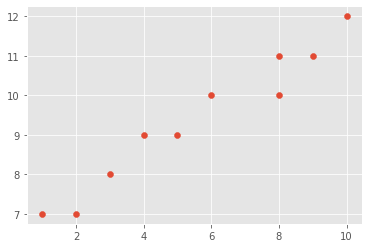

In [26]:
# Scatter plot
fig, ax = plt.subplots()
plt.scatter(X, Y)

In [27]:
''' Your observations about the relationship between X and Y 

It appears that as x increases, y increases. 
The relationship looks approximately linear and homoscedastic.
'''

' Your observations about the relationship between X and Y \n\nIt appears that as x increases, y increases. \nThe relationship looks approximately linear and homoscedastic.\n'

## Write a function `calc_slope()`

Write a function `calc_slope()` that takes in X and Y and calculates the slope using the formula shown above. 

In [28]:
# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    
    x_bar = np.mean(xs)
    y_bar = np.mean(ys)
    xy_bar = np.mean(xs*ys)
    x_bar_squared = x_bar**2
    x_squared_mean = np.mean(xs**2)
    
    slope = ((x_bar * y_bar) - xy_bar) / (x_bar_squared - x_squared_mean)
    
    return slope

calc_slope(X,Y)

# 0.5393518518518512

0.5393518518518512

Great, so we have our slope. Next we calculate the intercept. 

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat c = \overline y - \hat m \overline x $$


## Write a function best_fit()

Write a function `best_fit()` that takes in X and Y, calculates the slope and intercept using the formula. The function should return slope and intercept values. 

In [29]:
# use the slope function with intercept formula to return calculate slope and intercept from data points

def best_fit(xs,ys):
    
    # Calculate estimated slope, or beta_1
    m_hat = calc_slope(xs,ys)
    
    # Calculate estimated intercept, or beta_0
    b_hat = np.mean(ys) - (m_hat * np.mean(xs))
    
    return m_hat, b_hat

# Uncomment below to test your function

m, b = best_fit(X,Y)
m, b

# (0.5393518518518512, 6.379629629629633)

(0.5393518518518512, 6.379629629629633)

We now have a working model with `m` and `c` as model parameters. We can create a line for the data points using the calculated slope and intercept:

* Recall that $y = mx + c$. We can now use slope and intercept values along with X data points (features) to calculate the Y data points (labels) of the regression line. 

## Write a function reg_line()

Write a function `reg_line()` that takes in slope, intercept and X vector and calculates the regression line using $y= mx + c$ for each point in X

In [30]:
def reg_line (m, b, xs):
    
    reg_ys = xs * m + b
    #reg_line = list(zip(xs, reg_ys))
    
    return reg_ys

# Uncomment below
regression_line = reg_line(m,b,X)
regression_line

array([ 6.91898148,  7.45833333,  7.99768519,  8.53703704,  9.07638889,
        9.61574074, 10.69444444, 10.69444444, 11.2337963 , 11.77314815])

## Plot the (x,y) data points and draw the calculated regression line for visual inspection

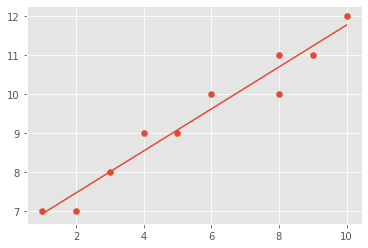

In [31]:
# Plot data and regression line
fig, ax = plt.subplots()

# Plot original x and y coordinates
plt.scatter(X, Y)

# plot regression line
plt.plot(X, regression_line)

So there we have it, our least squares regression line. This is the best fit line and does describe the data pretty well (still not perfect though). 

## Describe your Model Mathematically and in Words

In [32]:
# Your answer here




## Predicting new data

So, how might you go about actually making a prediction based on this model you just made?

Now that we have a working model with m and b as model parameters. We can fill in a value of x with these parameters to identify a corresponding value of $\hat y$ according to our model. Recall the formula:

$$\hat y = \hat mx + \hat c$$

Let's try to find a y prediction for a new value of $x = 7$, and plot the new prediction with existing data 

In [33]:
x_new = 7
y_predicted = reg_line (m, b, x_new)
y_predicted

# 10.155092592592592

10.155092592592592

## Plot the prediction with the rest of the data

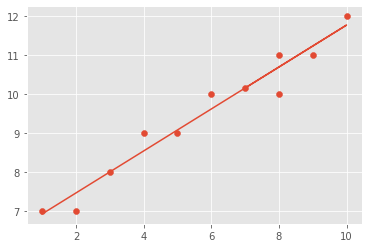

In [34]:
# Plot as above and show the predicted value
X = np.concatenate((X, [x_new]))
Y = np.concatenate((Y, [y_predicted]))
regression_line = np.concatenate((regression_line, [y_predicted]))

# Plot data and regression line
fig, ax = plt.subplots()

# Plot original x and y coordinates
plt.scatter(X, Y)

# plot regression line
plt.plot(X, regression_line)

You now know how to create your own models, which is great! Next, you'll find out how to determine the accuracy of your model!

## Summary

In this lesson, you learned how to perform linear regression for data that are linearly related. You first calculated the slope and intercept parameters of the regression line that best fit the data. You then used the regression line parameters to predict the value ($\hat y$-value) of a previously unseen feature ($x$-value). 